# Ekstraksi Kata Kunci pada dokumen


In [2]:
import pandas as pd
import numpy as np
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/Data/data_label_news.csv")
data

,Date,Title,Content,Label
0,01-10-2023,Megawati Ungkap Orang Luar Tak Bisa Langsung J...,"jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...",politik
1,01-10-2023,"Peringati Hari Kesaktian Pancasila, KawanJuang...","jpnn.com, PURWAKARTA - Para sukarelawan penduk...",politik
2,01-10-2023,"Ganjar dan Anies Hadiri Acara IdeaFest, di Man...","jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...",politik
3,01-10-2023,"Silaturahmi ke Rembang, Anies Diberi Tongkat K...","jpnn.com, JAKARTA - Anies Baswedan mengunjungi...",politik
4,01-10-2023,"Survei Erick Thohir Teratas di Jatim, Pengamat...","jpnn.com, JAKARTA - Nama Erick Thohir punya ke...",politik
...,...,...,...,...
1723,01-11-2023,"Lalu Muhammad Zohri Finis Keenam, Indonesia Pa...","jpnn.com, JAKARTA - Kontingen atlet Indonesia ...",Olahraga
1724,01-11-2023,Garuda Muda Siap Beri Obat Pelipur Lara Bagi F...,jpnn.com - Tim bulu tangkis beregu campuran In...,Olahraga
1725,01-11-2023,Bulu Tangkis Asian Games 2022: Tim Putra China...,jpnn.com - Tim bulu tangkis beregu putra China...,Olahraga
1726,01-11-2023,"Asian Games 2022: Kehabisan Bensin, Timnas Bas...",jpnn.com - Timnas basket putra Indonesia menga...,Olahraga


## Pre Processing

In [5]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Ambil satu data

In [28]:
sampel = data.head(1)
sampel

,Date,Title,Content,Label
0,01-10-2023,Megawati Ungkap Orang Luar Tak Bisa Langsung J...,"jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...",politik


## Stopword

In [29]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Download stopwords dataset
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Hapus simbol dan angka menggunakan regular expression
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenisasi kata-kata
    words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word.lower() not in stop_words]

    # Gabungkan kembali kata-kata yang sudah diolah
    processed_text = ' '.join(words)

    return processed_text

def build_co_occurrence_matrix(corpus, window_size):
    # Build unique words
    unique_words = set()
    for text in corpus:
        text = preprocess_text(text)
        for word in word_tokenize(text):
            unique_words.add(word)

    word_search_dict = {word: np.zeros(shape=(len(unique_words))) for word in unique_words}
    word_list = list(word_search_dict.keys())
    for text in corpus:
        text = preprocess_text(text)
        text_list = word_tokenize(text)
        for idx, word in enumerate(text_list):
            # Pick word in the size range
            i = max(0, idx - window_size)
            j = min(len(text_list) - 1, idx + window_size)
            search = [text_list[idx_] for idx_ in range(i, j + 1)]
            search.remove(word)
            for neighbor in search:
                # Get neighbor idx in word_search_dict
                nei_idx = word_list.index(neighbor)
                word_search_dict[word][nei_idx] += 1
    return word_search_dict

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
coo_dict=build_co_occurrence_matrix(sampel['Content'], window_size=1)

coo_dict

{'aturan': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0.]),
 'Megawati': array([0., 2., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 2.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0.]),
 'kesempatan': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [31]:
coo_df = pd.DataFrame(coo_dict,index=coo_dict.keys()).astype('int')
coo_df

,aturan,Megawati,kesempatan,pendatang,memilih,diomongkan,diljpnnYuk,PDIP,Ketua,Soekarnoputri,...,presiden,dinamika,putra,dipilih,Pangarep,Solidaritas,resmi,Menurutnya,kontradiktif,Presiden
aturan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Megawati,0,2,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
kesempatan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pendatang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
memilih,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solidaritas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
resmi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Menurutnya,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kontradiktif,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
coo_df.to_excel('matrix-coo-df.xlsx', index_label='Nama_Index')


## Graph

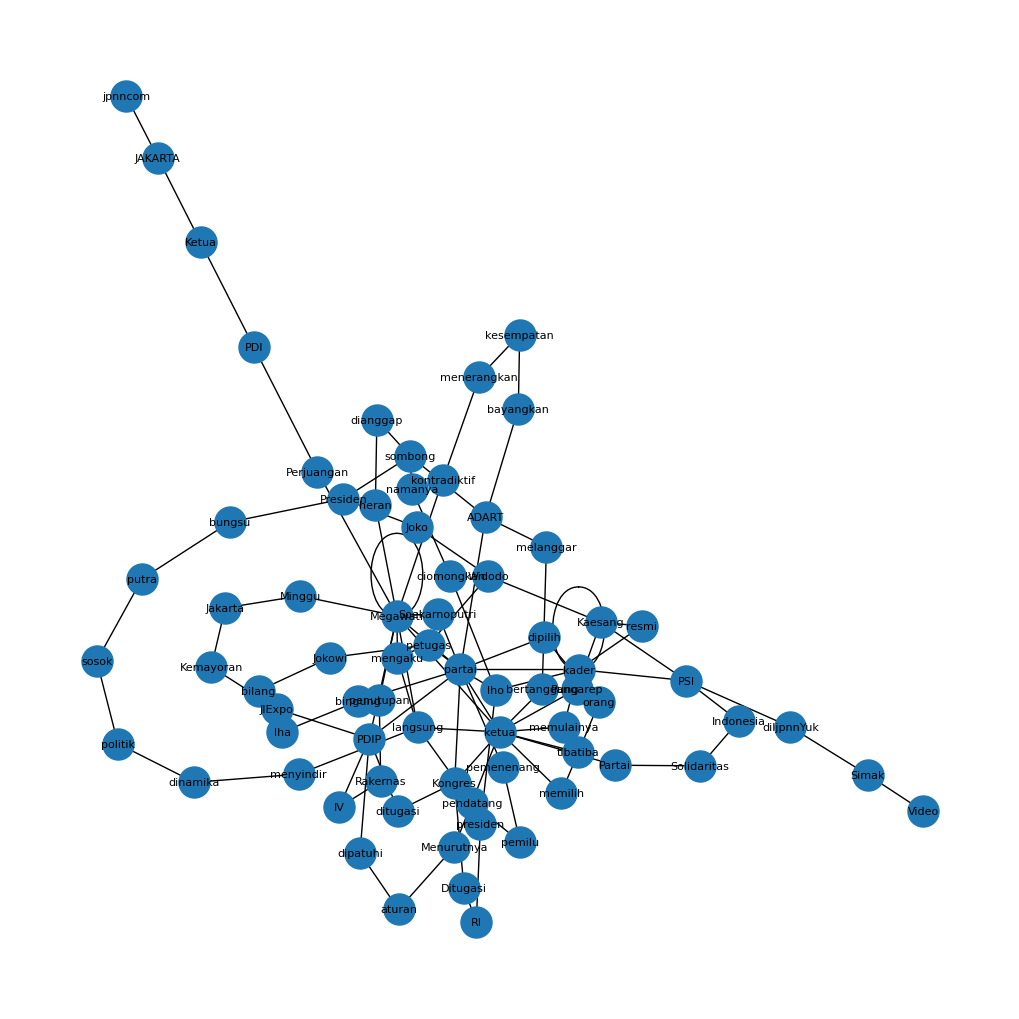

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert the DataFrame to a networkx graph
G = nx.from_pandas_adjacency(coo_df)

# Visualize the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=500, font_color='black')
plt.show()

## Page Rank
PageRank centrality adalah suatu metode untuk mengukur pentingnya simpul (node) dalam suatu jaringan berbasis graf. Metode ini awalnya dikembangkan oleh Larry Page dan Sergey Brin untuk menilai relevansi halaman web dalam mesin pencari Google, dan kemudian diadopsi dalam analisis jaringan umumnya. PageRank centrality mengukur seberapa penting atau otoritatif suatu simpul dengan memperhitungkan jumlah dan kualitas koneksi yang dimilikinya. Intinya, simpul-simpul yang dihubungkan dengan simpul lain yang juga memiliki keterhubungan yang tinggi akan mendapatkan skor PageRank yang lebih tinggi.



Rumus umum untuk menghitung nilai PageRank  dalam sebuah graf adalah:

$PR(A) = (1-d)  . \frac{1}{N}  + d \left( \frac{PR(T1)}{C(T1)} + \frac{PR(T2)}{C(T2)} + ... + \frac{PR(Tn)}{C(Tn)} \right)$



- $PR(A)$ adalah PageRank dari halaman $A$.

- $PR(T1)$ sampai $PR(Tn)$ adalah PageRank dari halaman $T1$ sampai $Tn$ yang mengarah ke halaman $A$ (yaitu halaman yang memiliki tautan ke $A$).

- $C(T1)$ sampai $C(Tn)$ adalah jumlah tautan keluar dari halaman $T1$ sampai $Tn$.

- $d$ adalah faktor damping, yang biasanya diatur ke 0.85.

In [33]:
# Menghitung PageRank
pagerank = nx.pagerank(G, alpha=0.85)

for node, rank in pagerank.items():
    print(f"Node {node}: PageRank = {rank}")

Node aturan: PageRank = 0.010314209079800216
Node Megawati: PageRank = 0.05115113045750846
Node kesempatan: PageRank = 0.011107346400846674
Node pendatang: PageRank = 0.009521165829154556
Node memilih: PageRank = 0.008288175092914286
Node diomongkan: PageRank = 0.009750340157255871
Node diljpnnYuk: PageRank = 0.011698533861745096
Node PDIP: PageRank = 0.024612143580176014
Node Ketua: PageRank = 0.01366109443899966
Node Soekarnoputri: PageRank = 0.008021332554540172
Node ADART: PageRank = 0.01684339608744418
Node bilang: PageRank = 0.010479459901931736
Node RI: PageRank = 0.010523623873804074
Node jpnncom: PageRank = 0.008446569362469635
Node PSI: PageRank = 0.01791521298972531
Node memulainya: PageRank = 0.008148677056159055
Node mengaku: PageRank = 0.014304861480418974
Node bertanggung: PageRank = 0.008394755227326656
Node IV: PageRank = 0.009934789570756978
Node lho: PageRank = 0.016332291592125424
Node Jakarta: PageRank = 0.010911586339434431
Node bungsu: PageRank = 0.01067624927583

In [34]:
pr = nx.pagerank(G)
sorted_d = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:3]
sorted_d

[('partai', 0.05385487341234689),
 ('Megawati', 0.05115113045750846),
 ('ketua', 0.043349664149207295)]

# Link Spreedsheet hitung manual :

https://docs.google.com/spreadsheets/d/1Rk5yPeQljZRo0lC-DcNa14eUIoN6SDCt/edit#gid=1387438943

## Hasil Hitung Manual di Excel :

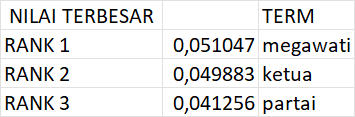